> ## Soal Tugas :

### Buatlah suatu code atau syntax dengan ketentuan :

-   Data Berisikan Nama, Mata Kuliah yang diambil di semester 3 dan 4 dan Nilai

-   Kemudian buatlah suatu pemograman berbasis fungsi yang mana jika mahasiswa mengambil Mata kuliah yang tidak memenuhi syarat lulus (syarat lulus minimal C) maka mata kuliah tersebut tidak bisa diambil.

-   Syarat mata kuliah yang akan diambil di semester 5 :

| Mata Kuliah Semester 5         | Syarat Mata Kuliah       |
|--------------------------------|--------------------------|
| Data Mining                    | Struktur Data            |
| Komputasi Statistik            | Analisis Data Statistika |
| Teori Optimasi                 | Metode Numerik           |
| Visualisasi Data dan Informasi | Algoritma Pemrograman    |
| Pembelajaran Mesin             | Statistika Sains Data    |
| Kecerdasan Buatan              | Algoritma Strategi       |

-   Jika mahasiswa tidak memenuhi syarat maka mahasiswa disarankan untuk

    mengulang mata kuliah tersebut.

-   Output nya yaitu mata kuliah yang direkomendasikan untuk diambil oleh

    mahasiswa jika mahasiswa lulus atau tidak mata kuliah tersebut.

> ## Jawaban Tugas :

### Menjalankan dengan memanggil fungsi

In [ ]:
import pandas as pd
from IPython.display import display

file_excel = 'Kasus Komstat.xlsx'
data = pd.read_excel(file_excel)

In [ ]:
# Fungsi untuk mengecek kelulusan mata kuliah
def cek_kelulusan(nilai):
    return 'Lulus' if nilai not in ['E', 'D'] else 'Tidak Lulus'

# Fungsi untuk menentukan rekomendasi mata kuliah semester 5
def rekomendasi_semester5(data):
    semester5 = {
        'Data Mining' : 'Struktur Data',
        'Komputasi Statistik' : 'ADS',
        'Teori Optimasi' : 'Metnum',
        'Visalisasi Data dan Informasi' : 'Alpro',
        'Pembelajaran Mesin' : 'SSD',
        'Kecerdasan Buatan' : 'Alstrat '
    }

    rekomendasi = []

    for mata_kuliah, syarat in semester5.items():
        if cek_kelulusan(data[syarat]) == 'Lulus':
            rekomendasi.append(f"Mata Kuliah {mata_kuliah} Dapat Anda Ambil")
        else:
            rekomendasi.append(f"Anda Tidak Bisa Mengambil {mata_kuliah}, Disarankan Untuk Mengulang Mata Kuliah {syarat}")

    return rekomendasi

# Fungsi untuk input nama dan menampilkan kelulusan mata kuliah serta rekomendasi semester 5
def info_mahasiswa():
    while True:
        print("Masukkan Nama (atau 'NO' untuk keluar):")
        nama = input().strip().upper()

        if nama == 'NO':
            print("Terima Kasih, Program Berbasis Fungsi Untuk Kelulusan Mata Kuliah Selesai.")
            break

        mahasiswa = data[data['NAMA'].str.upper() == nama]

        if mahasiswa.empty:
            print("Maaf, Nama Tidak Ditemukan.")
            continue

        print(f"\nKelulusan Mata Kuliah Untuk Mahasiswa {nama}")
        for mata_kuliah in data.columns[2:]:
            status = cek_kelulusan(mahasiswa[mata_kuliah].values[0])
            print(f"{mata_kuliah} : {status}")

        print("\nRekomendasi Mata Kuliah Untuk Semester 5")
        rekomendasi = rekomendasi_semester5(mahasiswa.iloc[0])
        for rek in rekomendasi:
            print(rek)

        print("\nBerikut Tabel Nilai Mahasiswa")
        display(pd.DataFrame(mahasiswa.drop(columns='No')))

In [ ]:
# Memanggil fungsi untuk input nama dan menampilkan hasilnya
info_mahasiswa()

Masukkan Nama (atau 'NO' untuk keluar):
A

Kelulusan Mata Kuliah Untuk Mahasiswa A
Struktur Data : Lulus
ADS : Lulus
Metnum : Lulus
Alpro : Lulus
SSD : Lulus
Alstrat  : Lulus

Rekomendasi Mata Kuliah Untuk Semester 5
Mata Kuliah Data Mining Dapat Anda Ambil
Mata Kuliah Komputasi Statistik Dapat Anda Ambil
Mata Kuliah Teori Optimasi Dapat Anda Ambil
Mata Kuliah Visalisasi Data dan Informasi Dapat Anda Ambil
Mata Kuliah Pembelajaran Mesin Dapat Anda Ambil
Mata Kuliah Kecerdasan Buatan Dapat Anda Ambil

Berikut Tabel Nilai Mahasiswa


,NAMA,Struktur Data,ADS,Metnum,Alpro,SSD,Alstrat
0,A,AB,B,A,BC,A,BC


Masukkan Nama (atau 'NO' untuk keluar):
B

Kelulusan Mata Kuliah Untuk Mahasiswa B
Struktur Data : Lulus
ADS : Lulus
Metnum : Tidak Lulus
Alpro : Lulus
SSD : Lulus
Alstrat  : Lulus

Rekomendasi Mata Kuliah Untuk Semester 5
Mata Kuliah Data Mining Dapat Anda Ambil
Mata Kuliah Komputasi Statistik Dapat Anda Ambil
Anda Tidak Bisa Mengambil Teori Optimasi, Disarankan Untuk Mengulang Mata Kuliah Metnum
Mata Kuliah Visalisasi Data dan Informasi Dapat Anda Ambil
Mata Kuliah Pembelajaran Mesin Dapat Anda Ambil
Mata Kuliah Kecerdasan Buatan Dapat Anda Ambil

Berikut Tabel Nilai Mahasiswa


,NAMA,Struktur Data,ADS,Metnum,Alpro,SSD,Alstrat
1,B,C,B,E,A,AB,B


Masukkan Nama (atau 'NO' untuk keluar):
ZZ
Maaf, Nama Tidak Ditemukan.
Masukkan Nama (atau 'NO' untuk keluar):
NO
Terima Kasih, Program Berbasis Fungsi Untuk Kelulusan Mata Kuliah Selesai.


### Menjalankan dengan web STREAMLIT

install streamlit terlebih dahulu

In [ ]:
#!pip install streamlit

In [ ]:
%%writefile app.py
import pandas as pd
import streamlit as st

file_excel = 'Kasus Komstat.xlsx'
data = pd.read_excel(file_excel)

def cek_kelulusan(nilai):
    status = 'Lulus' if nilai not in ['E', 'D'] else 'Tidak Lulus'
    return status

def rekomendasi_semester5(data):
    semester5 = {
        'Data Mining': 'Struktur Data',
        'Komputasi Statistik': 'ADS',
        'Teori Optimasi': 'Metnum',
        'Visalisasi Data dan Informasi': 'Alpro',
        'Pembelajaran Mesin': 'SSD',
        'Kecerdasan Buatan': 'Alstrat '
    }

    rekomendasi = []

    for mata_kuliah, syarat in semester5.items():
        if cek_kelulusan(data[syarat]) == 'Lulus':
            rekomendasi.append(f"Mata Kuliah {mata_kuliah} Dapat Anda Ambil")
        else:
            rekomendasi.append(f"Anda Tidak Bisa Mengambil {mata_kuliah}, Disarankan Untuk Mengulang Mata Kuliah {syarat}")

    return rekomendasi

def display_info_mahasiswa():
    st.title('Program Berbasis Fungsi Untuk Kelulusan Mata Kuliah')

    nama = st.text_input("Masukkan Nama (atau 'NO' untuk keluar):").strip().upper()


    if nama and nama != 'NO':
        mahasiswa = data[data['NAMA'].str.upper() == nama]

        if mahasiswa.empty:
            st.warning("Maaf, nama tidak ditemukan.")
        else:
            st.markdown(f"## Kelulusan Mata Kuliah Untuk Mahasiswa {nama}")
            for mata_kuliah in data.columns[2:]:
                status = cek_kelulusan(mahasiswa[mata_kuliah].values[0])
                st.text(f"{mata_kuliah.ljust(30, ' ')}: {status}")

            st.markdown("## Rekomendasi Mata Kuliah Untuk Semester 5:")
            rekomendasi = rekomendasi_semester5(mahasiswa.iloc[0])
            for rek in rekomendasi:
                st.text(rek)

            st.markdown("## Berikut Tabel Nilai Mahasiswa")
            st.text(mahasiswa.drop(columns='No'))

    else:
        if nama == 'NO':
            st.write("Terima Kasih, Program Berbasis Fungsi Untuk Kelulusan Mata Kuliah Selesai.")


# Running the Streamlit app
if __name__ == '__main__':
    display_info_mahasiswa()



Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

### Cara menjalankan

setelah menjalankan code pada bar code ke-2 klik url yang ada pada output, maka akan muncul web seperti berikut
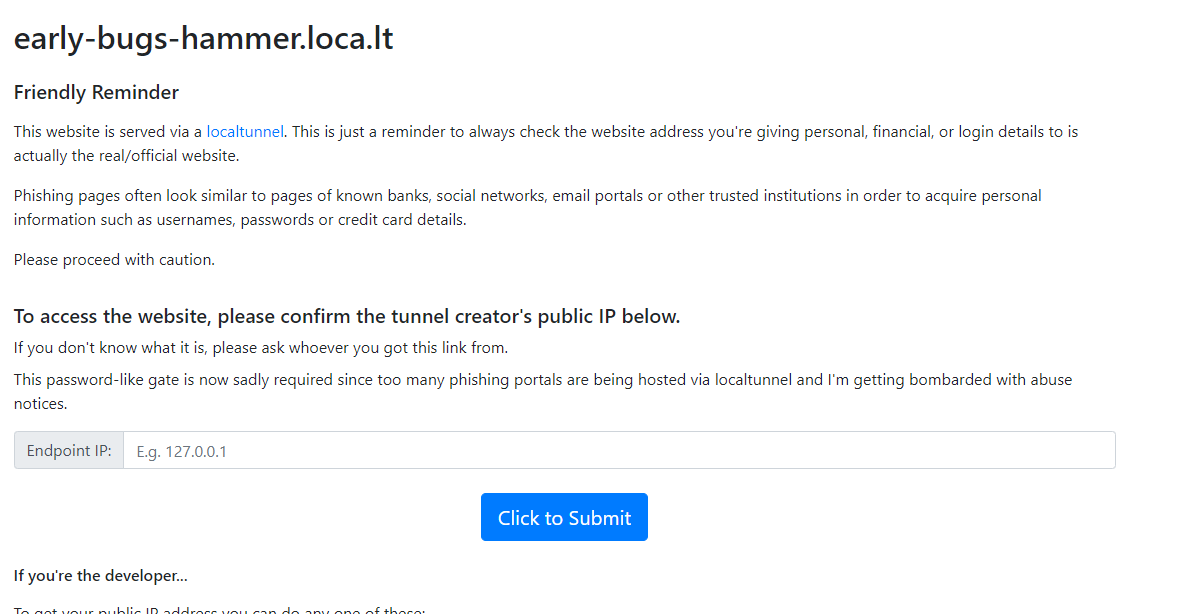


Kemudian masukkan ip. Ip yang di butuhkan terdapat pada output di bagian di bagian External URL, **copy 9 angka** atau **seluruh angka di belakang titik dua (:)** pada URL


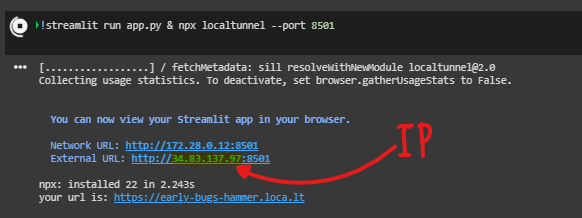

masukkan ip pada *Endpoint IP* pada web yang terbuka lalu klik submit

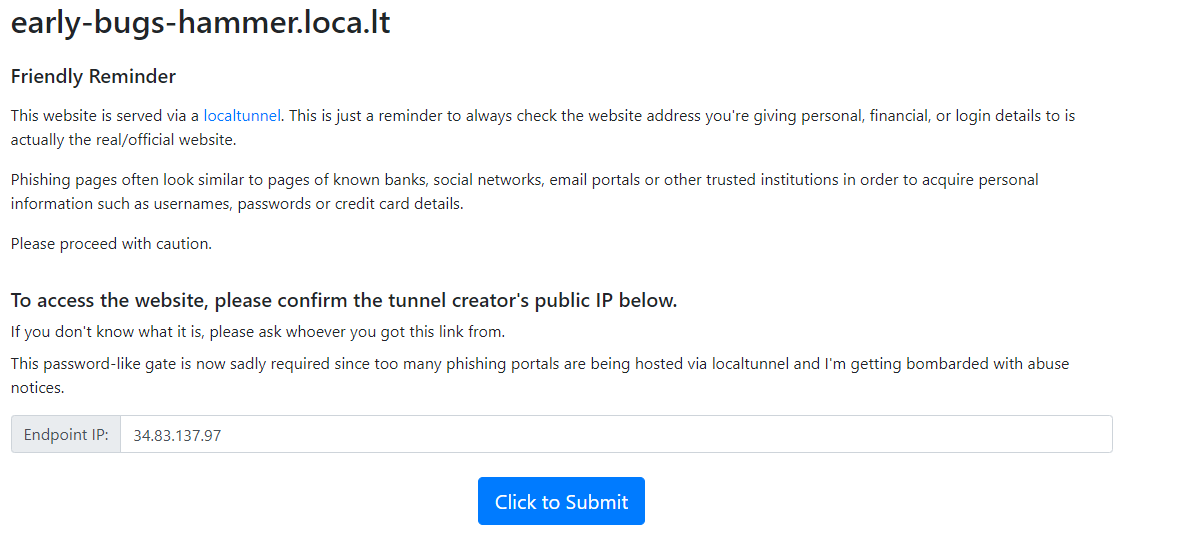



maka akan dialihkan ke web STREAMLIT, lalu code dapat dijalankan